In [1]:
import requests, six
import lxml.html as lh
import pandas as pd
from itertools import cycle, islice
from matplotlib import colors
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
df_5 = pd.read_excel("base_dados/IDEB_municipios_ceara_5_ano.xlsx")
df_9 = pd.read_excel("base_dados/IDEB_municipios_ceara_9_ano.xlsx")
saeb = pd.read_excel("base_dados/saeb_2017_2019.xlsx")


In [4]:
saeb_ideb_5_9.head(3)

,Sigla da UF,Código do Município,Nome do Município,Código da Escola,Nome da Escola,Rede,ano,MT_5o,IDEB_5o,MT_9o,IDEB_9o
0,CE,2300101,Abaiara,23168862,CORONEL HUMBERTO BEZERRA EEIF,Municipal,2005,163.95,3.2,NaN,NaN
1,CE,2300101,Abaiara,23168862,CORONEL HUMBERTO BEZERRA EEIF,Municipal,2007,160.48,3.4,205.61,3.3
2,CE,2300101,Abaiara,23168862,CORONEL HUMBERTO BEZERRA EEIF,Municipal,2009,268.85,6.7,332.84,5.7


In [3]:
df_5.head()

,Município,ano_2005,ano_2007,ano_2009,ano_2011,ano_2013,ano_2015,ano_2017,ano_2019
0,ABAIARA,3.5,3.5,6.5,5.8,7.1,5.5,5.8,6.1
1,ACARAPE,2.6,3.0,3.1,4.1,3.9,5.4,5.4,5.4
2,ACARAÚ,3.4,3.7,4.0,4.8,4.5,5.3,6.3,6.5
3,ACOPIARA,2.8,3.5,4.4,4.8,5.0,6.0,6.0,6.0
4,AIUABA,4.4,3.9,4.6,5.4,6.0,5.8,6.1,6.8


In [4]:
df_9.head()

,Município,ano_2005,ano_2007,ano_2009,ano_2011,ano_2013,ano_2015,ano_2017,ano_2019
0,ABAIARA,3.4,3.2,5.0,4.0,4.1,4.4,4.8,4.6
1,ACARAPE,2.6,3.1,3.4,3.3,3.4,3.9,4.7,4.9
2,ACARAÚ,3.4,3.5,3.6,4.0,4.2,4.5,5.1,5.3
3,ACOPIARA,3.0,3.5,4.0,4.1,4.3,5.4,5.2,5.5
4,AIUABA,2.2,3.8,4.5,4.8,4.4,4.8,4.8,5.5


In [99]:
cidade_cactus = ["Acaraú", "Beberibe", "Crateús", "Capistrano", "Cruz",
                "Jijoca De Jericoacoara", "Madalena", "Morrinhos", "Panelas", "Pires Ferreira",
                "Pereiro", "Reriutaba", "Ubajara", "Tauá"]
cidade_cactus

['Acaraú',
 'Beberibe',
 'Crateús',
 'Capistrano',
 'Cruz',
 'Jijoca De Jericoacoara',
 'Madalena',
 'Morrinhos',
 'Panelas',
 'Pires Ferreira',
 'Pereiro',
 'Reriutaba',
 'Ubajara',
 'Tauá']

In [100]:
df_5['Município'] = df_5['Município'].str.title()
df_9['Município'] = df_9['Município'].str.title()

In [107]:
lista_cactus_5 = []
for index, row in df_5.iterrows():
    if row['Município'] in cidade_cactus:
        lista_cactus_5.append("cidade-cactus")
    elsea
        lista_cactus_5.append("não cidade-cactus")
        
df_5["cactus"] = lista_cactus_5

In [102]:
lista_cactus_9 = []
for index, row in df_9.iterrows():
    if row['Município'] in cidade_cactus:
        lista_cactus_9.append("cidade-cactus")
    else:
        lista_cactus_9.append(0)
        
df_9["cactus"] = lista_cactus_9

In [103]:
list(df_5.columns)

['Município',
 'CO_MUNICIPIO',
 'ano_2007',
 'ano_2009',
 'ano_2011',
 'ano_2013',
 'ano_2015',
 'ano_2017',
 'ano_2019',
 'cactus']

In [104]:
list(df_9.columns)

['Município',
 'ano_2005',
 'ano_2007',
 'ano_2009',
 'ano_2011',
 'ano_2013',
 'ano_2015',
 'ano_2017',
 'ano_2019',
 'cactus']

In [109]:
from siuba import *
df_tidy_5 = (df_5 >>
    gather("year", "notas", "ano_2013", "ano_2015", "ano_2017", "ano_2019"))

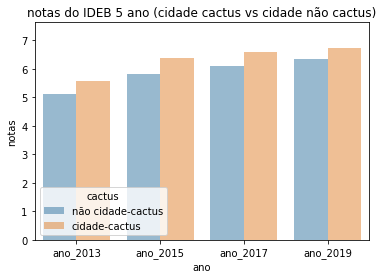

In [110]:
import seaborn as sns
(sns.barplot(x = "year", y = "notas", hue = "cactus", data = df_tidy_5, errwidth = 0, alpha = 0.5)
    .set(xlabel = "ano", ylabel = "notas", title = "notas do IDEB 5 ano (cidade cactus vs cidade não cactus)"));

# teve um crescimento, porém não parece ter sido tão expressivo com a inserção da cactus

In [63]:
from siuba import *
df_tidy_9 = (df_9 >>
    gather("year", "notas", "ano_2013", "ano_2015", "ano_2017", "ano_2019"))

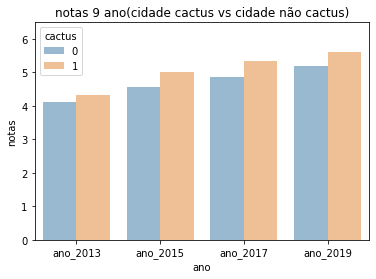

In [14]:
import seaborn as sns
(sns.barplot(x = "year", y = "notas", hue = "cactus", data = df_tidy_9, errwidth = 0, alpha = 0.5)
    .set(xlabel = "ano", ylabel = "notas", title = "notas 9 ano(cidade cactus vs cidade não cactus)"));

# teve um crescimento, porém não parece ter sido tão expressivo com a inserção da cactus

In [ ]:
import seaborn as sns
(sns.barplot(x = "year", y = "notas", hue = "cactus", data = df_tidy_9, errwidth = 0, alpha = 0.5)
    .set(xlabel = "ano", ylabel = "notas", title = "notas 9 ano(cidade cactus vs cidade não cactus)"));

# teve um crescimento, porém não parece ter sido tão expressivo com a inserção da cactus

In [22]:
saeb.head(1)

,CO_UF,NO_UF,CO_MUNICIPIO,MEDIA_5_LP_2017,MEDIA_5_MT_2017,MEDIA_9__2017,MEDIA_9_MT_2017,MEDIA_5_2019,MEDIA_5_MT_2019,MEDIA_9_LP_2019,MEDIA_9_MT_2019
0,11.0,Rondônia,1100015.0,230.95,241.15,260.87,258.55,210.48,233.47,268.37,273.59


In [64]:
saeb = pd.read_excel("saeb_2017_2019.xlsx")

In [65]:
saeb = saeb[saeb["CO_UF"] == 23.0]

In [66]:
saeb.head(2)

,CO_UF,Município,NO_UF,CO_MUNICIPIO,MEDIA_5_LP_2017,MEDIA_5_MT_2017,MEDIA_9_LP_2017,MEDIA_9_MT_2017,MEDIA_5_LP_2019,MEDIA_5_MT_2019,MEDIA_9_LP_2019,MEDIA_9_MT_2019
11094,23.0,ABAIARA,Ceará,2300101.0,NaN,NaN,257.93,255.43,194.30,202.41,238.23,239.96
11095,23.0,ACARAPE,Ceará,2300101.0,NaN,NaN,257.93,255.43,198.91,206.09,248.61,243.94


In [67]:
saeb['Município'] = saeb['Município'].str.title()

In [78]:
lista_cactus = []
for index, row in saeb.iterrows():
    if row['Município'] in cidade_cactus:
        lista_cactus.append("cidade-cactus")
    else:
        lista_cactus.append("não cidade-cactus")
        
saeb["cactus"] = lista_cactus

In [79]:
from siuba import *
saeb_tidy_5_lp = (saeb >>
    gather("year", "notas", "MEDIA_5_LP_2017", "MEDIA_5_LP_2019"))

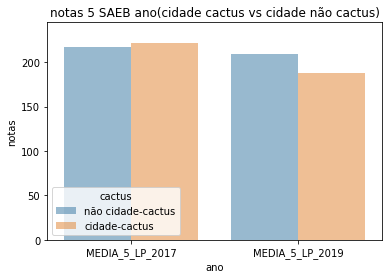

In [80]:
import seaborn as sns
(sns.barplot(x = "year", y = "notas", hue = "cactus", data = saeb_tidy_5_lp, errwidth = 0, alpha = 0.5)
    .set(xlabel = "ano", ylabel = "notas", title = "notas 5 SAEB ano(cidade cactus vs cidade não cactus)"));

# teve um crescimento, porém não parece ter sido tão expressivo com a inserção da cactus

In [83]:
from siuba import *
saeb_tidy_9 = (saeb >>
    gather("year", "notas", "MEDIA_5_MT_2017", "MEDIA_5_MT_2019"))

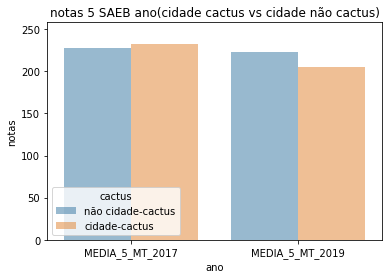

In [84]:
import seaborn as sns
(sns.barplot(x = "year", y = "notas", hue = "cactus", data = saeb_tidy_9, errwidth = 0, alpha = 0.5)
    .set(xlabel = "ano", ylabel = "notas", title = "notas 5 SAEB ano(cidade cactus vs cidade não cactus)"));

# teve um crescimento, porém não parece ter sido tão expressivo com a inserção da cactus